In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Generating random data for training and testing

np.random.seed(12)
num_observations=5000

x1= np.random.multivariate_normal([0,0],[[1,.75],[.75,1]], num_observations);x1
x2= np.random.multivariate_normal([1,4],[[1,.75],[.75,1]], num_observations);x2

array([[-0.71536626,  3.19335079],
       [ 0.50565017,  3.87254139],
       [ 2.17195684,  5.25131939],
       ...,
       [ 2.32559622,  4.18132864],
       [ 0.24707288,  4.22940428],
       [ 1.71902244,  4.82535048]])

In [10]:
simulated_separable_features = np.vstack((x1,x2)).astype(np.float32);simulated_separable_features

array([[-0.2015173 , -0.6833582 ],
       [ 0.37451947, -0.8280822 ],
       [-0.16189468, -1.2471066 ],
       ...,
       [ 2.3255963 ,  4.181329  ],
       [ 0.24707289,  4.2294044 ],
       [ 1.7190224 ,  4.8253503 ]], dtype=float32)

In [11]:
simulated_labels=np.hstack((np.zeros(num_observations),np.ones(num_observations)));simulated_labels

array([0., 0., 0., ..., 1., 1., 1.])

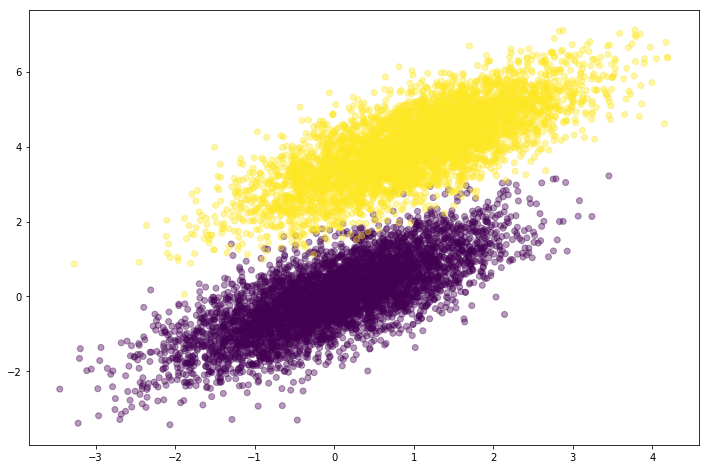

In [17]:
# plot randomly generated data

plt.figure(figsize=(12,8))
plt.scatter(simulated_separable_features[:,0], simulated_separable_features[:,1], c=simulated_labels,alpha=0.4)
plt.show()

In [18]:
# building a link function

def sigmoid(scores):
    return 1/(1+np.exp(-scores))

In [20]:
# defining the log likelihood

def log_likelihood(features, target, weights):
    scores=np.dot(features, weights)
    ll = np.sum(target*scores-np.log(1+np.exp(scores)))

In [22]:
# building the main logistic regression function

def logistic_regression(features, target, num_steps, learning_rate, add_intercept=False):
    if add_intercept:
        intercept=np.ones((features.shape[0],1))
        features=np.hstack((intercept,features))
        
    weights=np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores=np.dot(features,weights)
        predictions=sigmoid(scores)
        
        #update weights with log likelihood gradient
        output_error_signal=target-predictions

        gradient=np.dot(features.T,output_error_signal)
        weights += learning_rate*gradient

        #print log likelihood every so often
        if step%10000==0:
            print(log_likelihood(features,target,weights))
    
    return weights


In [28]:
# weights for logistic regression built from scratch
weights = logistic_regression(simulated_separable_features, simulated_labels, num_steps=5000,
                              learning_rate=5e-5, add_intercept=True)
print("Logistic regression from scratch ", weights)

None
Logistic regression from scratch  [ 686.83372484 1662.90676462 5494.11715249]


Accuracy from scratch: 0.2752


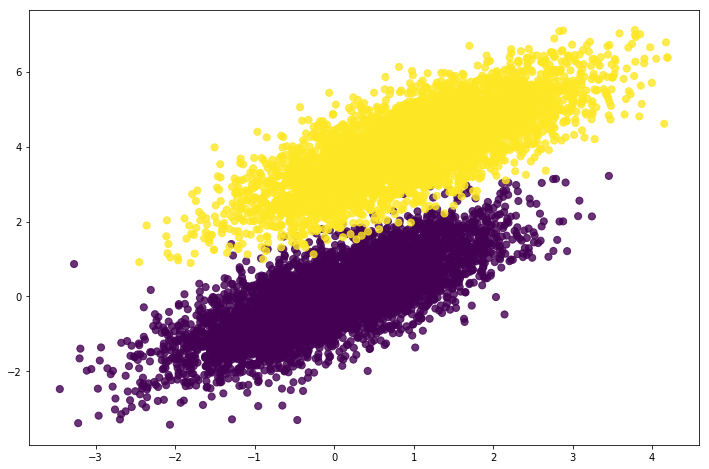

In [27]:
final_scores = np.dot(np.hstack((np.ones((simulated_separable_features.shape[0], 1)),
                                 simulated_separable_features)), weights)
preds = np.round(sigmoid(final_scores))

print ('Accuracy from scratch: {0}'.format((preds == simulated_labels).sum().astype(float) / len(preds)))

# SOLVED PLOT

plt.figure(figsize = (12, 8))
plt.scatter(simulated_separable_features[:, 0], simulated_separable_features[:, 1],
            c = preds == simulated_labels - 1, alpha = .8, s = 50)
plt.show()

https://github.com/sagarmk/Logistic-regression-from-scratch/blob/master/logistic_regression_from_scratch.py